In [1]:
# Local imports
import os
import glob
import re
import sys
import argparse

# Third-party imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib
import cartopy.crs as ccrs
import iris
import iris.coord_categorisation as coord_cat
import iris.plot as iplt
import scipy
import pdb
import datetime
import iris.quickplot as qplt

# Import dictionaries and functions from my module
import dictionaries as dic
import functions as fnc

In [2]:
# Set up the variables
model = "HadGEM3-GC31-MM"
variable = "psl"
region = "global"
season = "DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2019"
obs_path = dic.obs_path
models = dic.psl_full_models
base_dir = dic.base_dir_skm_pro
output_dir = dic.plots_dir_canari

In [3]:
# Process the observations
obs_anomaly = fnc.read_obs(variable, region, forecast_range,
                            season, obs_path, start_year, end_year)

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [4]:
# Load and process the model data
datasets = fnc.load_data(dic.base_dir_skm_pro, models, variable, region,
                            forecast_range, season)

# Process the model data
model_anomaly, _ = fnc.process_data(datasets, variable)

Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r7i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r6i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r9i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r8i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/EC-Earth3/global/years_2-9/DJFM/outputs/mergetime/mergetime_EC-Earth3_psl_global_2-9_DJFM-r10i2.nc
Skipping file /home/users/benhutch/skill-maps-processed-data/psl/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_psl_global_2-9_DJFM-r3i1.nc
Skipping file /ho

In [5]:
# Make sure that the model and obs have the same time period
model_anomaly = fnc.constrain_years(model_anomaly, models)

# Remove years containing nans from the observations and align the time periods
# for the observations and model
obs_anomaly, model_anomaly = fnc.remove_years_with_nans(obs_anomaly, model_anomaly, models)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

Calculating NAO index using standard definition
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r3i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r7i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r6i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r2i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r8i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r5i1p1f1
Calculating model NAO index using default definition
calculated NAO for model BCC-CSM2-MR member r1i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-HR member r1i1p

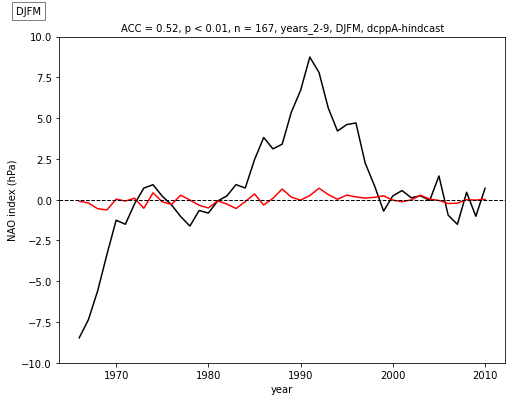

In [6]:
# Calculate the NAO index
obs_nao, model_nao = fnc.calculate_nao_index_and_plot(obs_anomaly, model_anomaly, models, variable, season,
                                                        forecast_range, output_dir, plot_graphics=True)

In [7]:
print(obs_nao)

<xarray.DataArray 'filled-2778791e18357c7d84fc6a98b785d4de' (time: 45)>
dask.array<sub, shape=(45,), dtype=float64, chunksize=(8,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1966-12-31 1967-12-31 ... 2010-12-31
